In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

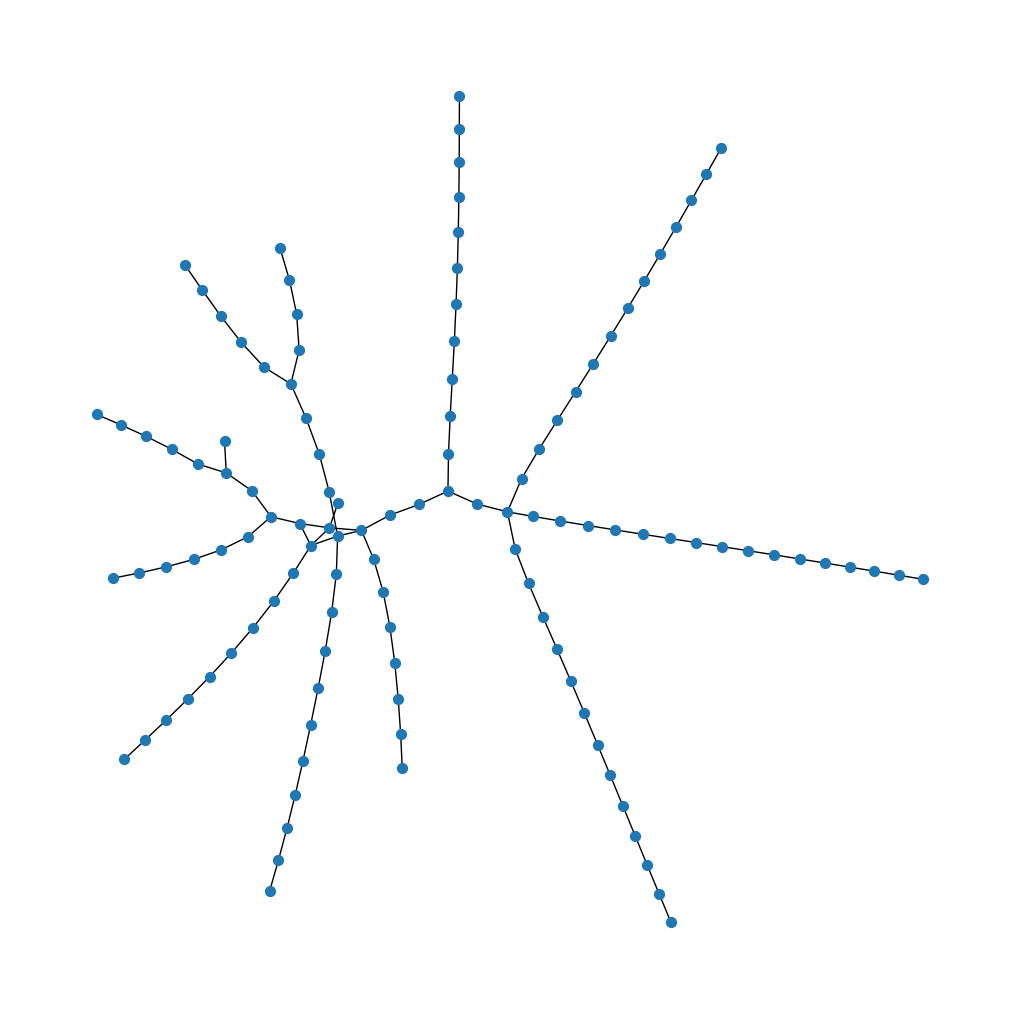

In [38]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        edges.add((stop_name, next_stop_name))
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)

network = nx.Graph()
network.add_nodes_from(stations)
network.add_edges_from(edges)

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw(network, layout, node_size=50)

In [39]:
NL = list(network)
NL

['Chiswick Road',
 'Community College',
 'Back Bay',
 'Allston Street',
 'Kenmore',
 'Chinatown',
 "Packard's Corner",
 'Northeastern University',
 'Back of the Hill',
 'Chestnut Hill',
 'Ashmont',
 'Park Street',
 'Braintree',
 'Riverside',
 'South Street',
 'Magoun Square',
 'Kent Street',
 'Sullivan Square',
 'Forest Hills',
 'Brigham Circle',
 'Lechmere',
 'Green Street',
 'Shawmut',
 'Newton Highlands',
 'Heath Street',
 'Washington Street',
 'Quincy Adams',
 'Copley',
 'Prudential',
 'Fields Corner',
 'Hynes Convention Center',
 'Waban',
 'Longwood',
 'Chestnut Hill Avenue',
 'Massachusetts Avenue',
 'Boston University East',
 'Symphony',
 'Englewood Avenue',
 'Bowdoin',
 'Haymarket',
 'Beaconsfield',
 'Gilman Square',
 'Riverway',
 'Maverick',
 'Orient Heights',
 'Quincy Center',
 'Brandon Hall',
 'Mission Park',
 'State',
 'Boston University Central',
 'Boston College',
 'Malden Center',
 'Suffolk Downs',
 'Tufts Medical Center',
 'Davis',
 'Longwood Medical Area',
 'Wellington

In [40]:
def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1], reverse = True)

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted


In [41]:


# Concert/Stadium cluster of nodes (Crypto arena, stadiums near USC, dodger stadium)
print(f"TD Garden - North Station, index {NL.index('North Station')}")
print(f"Big Night Live - North Station, index {NL.index('North Station')}")
print(f"Fenway Park - Kenmore, index {NL.index('Kenmore')}")
print(f"Harvard Stadium - Harvard Ave, index {NL.index('Harvard')}")

Destination_station_ids = ['North Station', 'Kenmore', 'Harvard']

TD Garden - North Station, index 60
Big Night Live - North Station, index 60
Fenway Park - Kenmore, index 4
Harvard Stadium - Harvard Ave, index 117


In [42]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium_og = nx.adjacency_matrix(network)
A_stadium_og = A_stadium_og.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium_og, epsilon, 3))

('Hynes Convention Center',
 'Haymarket',
 'Fenway',
 "Saint Mary's Street",
 'Blandford Street',
 'Community College',
 'Science Park/West End',
 'Central',
 'Porter',
 'Kenmore',
 'North Station',
 'Harvard',
 'State',
 'Government Center',
 'Sullivan Square',
 'Lechmere',
 'Copley',
 'Longwood',
 'Boston University East',
 'Davis',
 'Kendall/MIT',
 'Hawes Street',
 'Park Street',
 'Kent Street',
 'Prudential',
 'Bowdoin',
 'Boston University Central',
 'Downtown Crossing',
 'Aquarium',
 'Charles/MGH',
 'Assembly',
 'East Somerville',
 'Arlington',
 'Brookline Village',
 'Alewife',
 'Union Square')

# Ok Now Onto the New Stuff

Let's figure out how to get delay data working...

In [43]:
import json

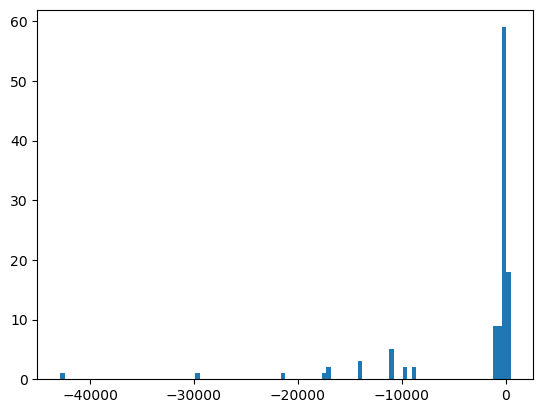

In [44]:
delays_file = open("../delay_data/named_rapid_transit_delays.json", 'r')
delays_json = delays_file.read()
delays_file.close()

delays = json.loads(delays_json)
fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

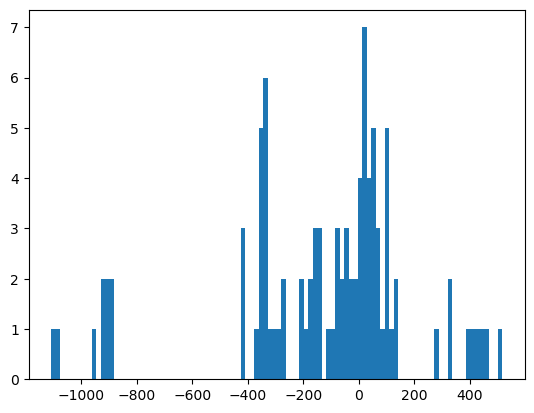

In [45]:
# remove outliers
delays = dict((s, d) for s, d in delays.items() if d > -5000)

fig, ax = plt.subplots()
hist = ax.hist(delays.values(), bins=100)

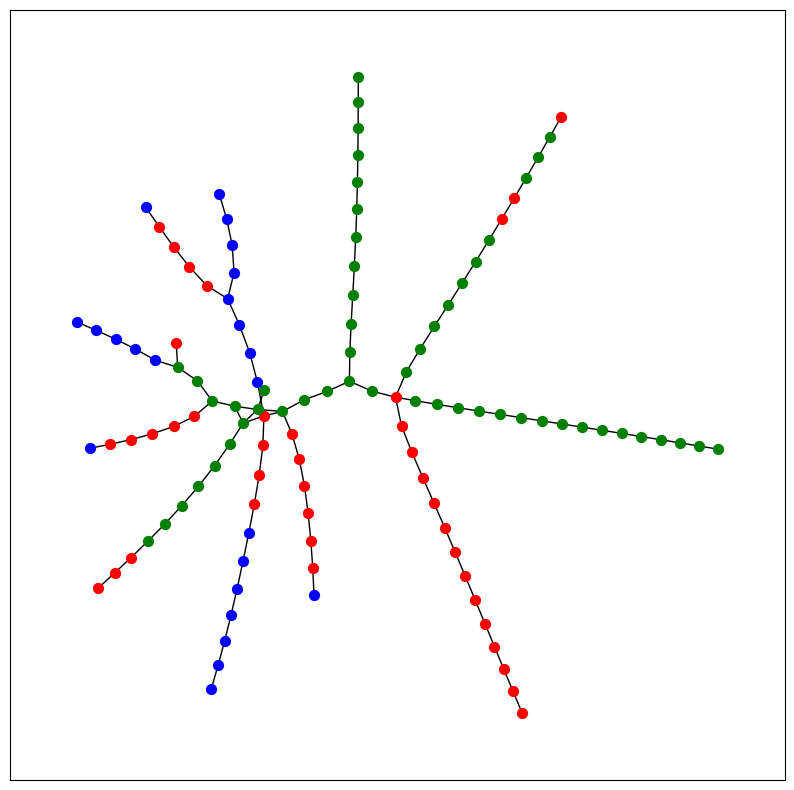

In [46]:
nx.set_node_attributes(network, delays, "avg_delay")

# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
nonnegative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay >= 0]
negative_delay_nodes = [n for (n, delay) in nx.get_node_attributes(network, "avg_delay").items() if delay < 0]
remaining_nodes = list(set(network.nodes()) - set(nonnegative_delay_nodes) - set(negative_delay_nodes))

fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=nonnegative_delay_nodes, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=negative_delay_nodes, node_color='green', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

## Weighted edges

In [47]:
network.edges()

EdgeView([('Chiswick Road', 'Chestnut Hill Avenue'), ('Chiswick Road', 'Sutherland Road'), ('Community College', 'Sullivan Square'), ('Community College', 'North Station'), ('Back Bay', 'Massachusetts Avenue'), ('Back Bay', 'Tufts Medical Center'), ('Allston Street', 'Griggs Street'), ('Allston Street', 'Warren Street'), ('Kenmore', 'Fenway'), ('Kenmore', "Saint Mary's Street"), ('Kenmore', 'Hynes Convention Center'), ('Kenmore', 'Blandford Street'), ('Chinatown', 'Downtown Crossing'), ('Chinatown', 'Tufts Medical Center'), ("Packard's Corner", 'Babcock Street'), ("Packard's Corner", 'Harvard Avenue'), ('Northeastern University', 'Museum of Fine Arts'), ('Northeastern University', 'Symphony'), ('Back of the Hill', 'Riverway'), ('Back of the Hill', 'Heath Street'), ('Chestnut Hill', 'Newton Centre'), ('Chestnut Hill', 'Reservoir'), ('Ashmont', 'Shawmut'), ('Park Street', 'Charles/MGH'), ('Park Street', 'Boylston'), ('Park Street', 'Downtown Crossing'), ('Park Street', 'Government Center

In [48]:
dict_of_delay = nx.get_node_attributes(network, "avg_delay")

def get_delay(node_name, attribute_dict = dict_of_delay):
    try:
      attribute_val = attribute_dict[node_name]
    except:
      attribute_val = 0
    return attribute_val

In [49]:
get_delay('Assembly', dict_of_delay)

70.1666666666667

C:\Users\bowen\anaconda3\Lib\site-packages\networkx\drawing\layout.py:726: RuntimeWarning: divide by zero encountered in divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


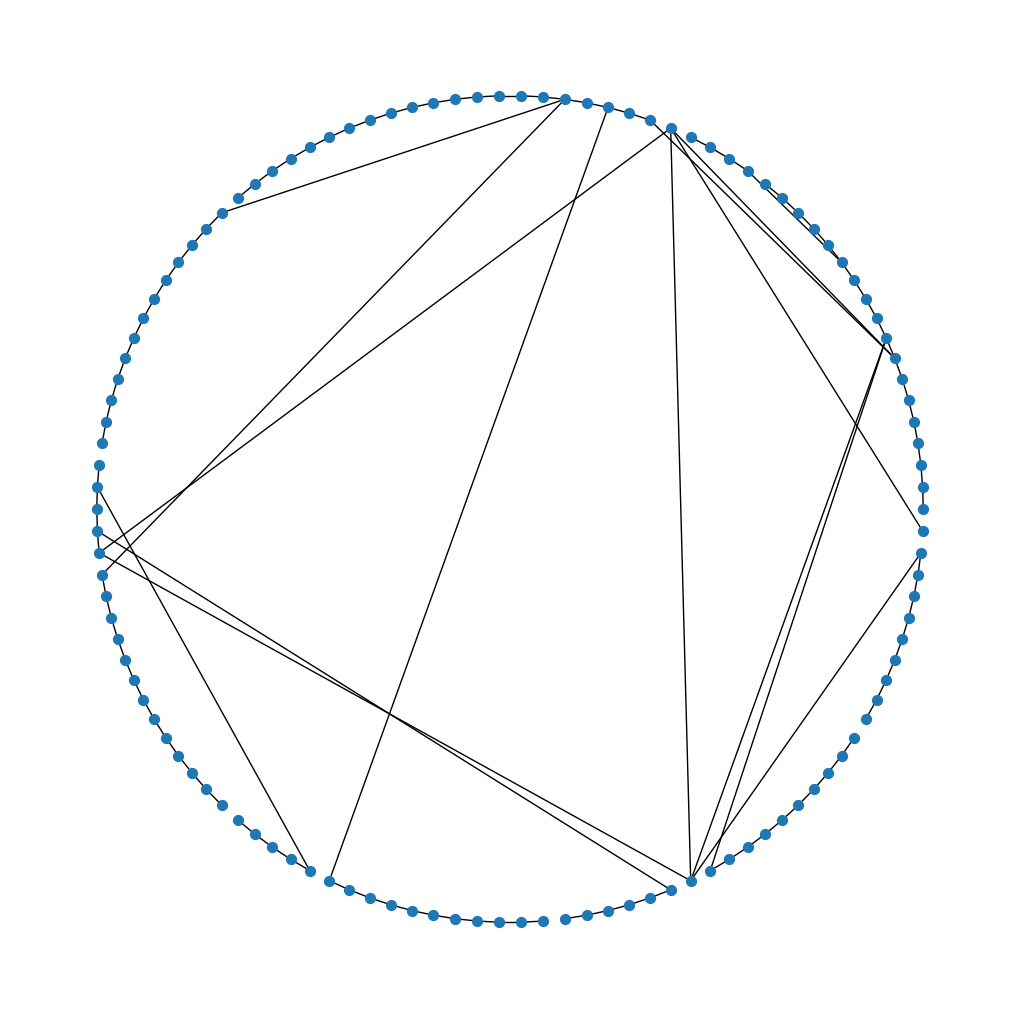

In [50]:
def open_line_file(filename):
    with open(f'../lines_from_gtfs_static_data/{filename}.txt', 'r') as f:
      lines = f.readlines()
    return lines

line_files = [
    'Red-C1-0',
    'Red-C1-1',
    'Red-C2-0',
    'Red-C2-1',
    'Green-B-C1-0',
    'Green-B-C1-1',
    'Green-C-C1-0',
    'Green-C-C1-1',
    'Green-D-C1-0',
    'Green-D-C1-1',
    'Green-E-C1-0',
    'Green-E-C1-1',
    'Orange-C1-0',
    'Orange-C1-1',
    'Blue-C1-0',
    'Blue-C1-1'
]

line_stations = map(open_line_file, line_files)

stations = set()
edges = set()

network2 = nx.Graph()

for line in line_stations:
    for i in range(len(line)-1):
        stop_name = line[i].rstrip()
        next_stop_name = line[i+1].rstrip()
        stations.add(stop_name)
        w = 0.5*(get_delay(stop_name, dict_of_delay) + get_delay(next_stop_name, dict_of_delay))
        if w < 0:
            w=0
        network2.add_edge(stop_name, next_stop_name, weight = w)   
    end_stop_name = line[-1].rstrip()
    stations.add(end_stop_name)


network2.add_nodes_from(stations)


fig = plt.figure(figsize = (10,10))
layout = nx.kamada_kawai_layout(network2)
nx.draw(network2, layout, node_size=50)

In [51]:
network2.edges(data=True)

EdgeDataView([('Alewife', 'Davis', {'weight': 230.375}), ('Davis', 'Porter', {'weight': 488.675}), ('Porter', 'Harvard', {'weight': 473.1}), ('Harvard', 'Central', {'weight': 383.6}), ('Central', 'Kendall/MIT', {'weight': 307.63333333333355}), ('Kendall/MIT', 'Charles/MGH', {'weight': 301.166666666667}), ('Charles/MGH', 'Park Street', {'weight': 0}), ('Park Street', 'Downtown Crossing', {'weight': 0}), ('Park Street', 'Government Center', {'weight': 0}), ('Park Street', 'Boylston', {'weight': 0}), ('Downtown Crossing', 'South Station', {'weight': 61.5714285714285}), ('Downtown Crossing', 'State', {'weight': 28.6964285714285}), ('Downtown Crossing', 'Chinatown', {'weight': 105.14285714285705}), ('South Station', 'Broadway', {'weight': 0.0}), ('Broadway', 'Andrew', {'weight': 0.0}), ('Andrew', 'JFK/UMass', {'weight': 0.0}), ('JFK/UMass', 'North Quincy', {'weight': 29.0}), ('JFK/UMass', 'Savin Hill', {'weight': 0.0}), ('North Quincy', 'Wollaston', {'weight': 98.5}), ('Wollaston', 'Quincy 

## OK lets see if this works

In [52]:
def normalize_graph(G):
    
    # Get list of old edge weights
    old_edge_weights = [data['weight'] for node1, node2, data in G.edges(data=True)]
    # Calculate mean of old edge weights
    mean_old_edge_weights = sum(old_edge_weights)/len(old_edge_weights)
    
    # importing Statistics module
    import statistics
    # Calculate standard deviation of old edge weights
    stdev_old_edge_weights = statistics.stdev(old_edge_weights)
    
    # Create new graph we will add edges to 
    new_G = nx.Graph()
    new_G.add_nodes_from(list(G))
    for node1, node2, data in G.edges(data=True):
        # Z-score
        std_weight = (data['weight'] - mean_old_edge_weights)/stdev_old_edge_weights
        # New standard deviation of: std_weight/5
        std_weight = std_weight/5
        # New mean of 1
        std_weight = std_weight + 1

        # if less than 0, turn to 0
        if std_weight < 0:
            std_weight = 0
            
        # Add new weights to new graph
        new_G.add_edge(node1, node2, weight = std_weight)
        
    return new_G
        

In [53]:
network3 = normalize_graph(network2)

In [54]:
network3.edges(data=True)

EdgeDataView([('Alewife', 'Davis', {'weight': 1.4026130044371174}), ('Davis', 'Porter', {'weight': 1.946429391300573}), ('Porter', 'Harvard', {'weight': 1.9136382948027089}), ('Harvard', 'Central', {'weight': 1.7252079168535053}), ('Central', 'Kendall/MIT', {'weight': 1.56527017705975}), ('Kendall/MIT', 'Charles/MGH', {'weight': 1.5516554681874426}), ('Charles/MGH', 'Park Street', {'weight': 0.9175890008611646}), ('Park Street', 'Downtown Crossing', {'weight': 0.9175890008611646}), ('Park Street', 'Government Center', {'weight': 0.9175890008611646}), ('Park Street', 'Boylston', {'weight': 0.9175890008611646}), ('Downtown Crossing', 'South Station', {'weight': 1.047219476353753}), ('Downtown Crossing', 'State', {'weight': 0.9780055246768807}), ('Downtown Crossing', 'Chinatown', {'weight': 1.138953339521362}), ('South Station', 'Broadway', {'weight': 0.9175890008611646}), ('Broadway', 'Andrew', {'weight': 0.9175890008611646}), ('Andrew', 'JFK/UMass', {'weight': 0.9175890008611646}), ('JF

## Ok lets see if our formula works on it...

In [55]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network3)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

('Allston Street',
 'Chinatown',
 'Harvard Avenue',
 'Shawmut',
 'Oak Grove',
 'Broadway',
 'Kenmore',
 'Back Bay',
 'North Station',
 "Packard's Corner",
 'Fenwood Road',
 'Northeastern University',
 'Stony Brook',
 'Harvard',
 'Science Park/West End',
 'Community College',
 'Back of the Hill',
 'Museum of Fine Arts',
 'Central',
 'Newton Highlands',
 'Downtown Crossing',
 'Aquarium')

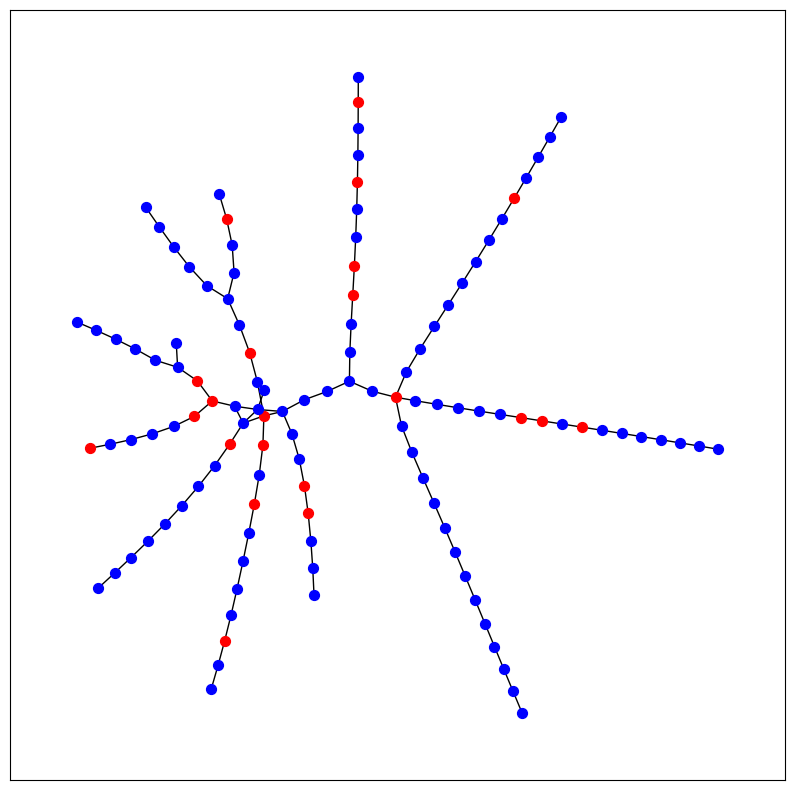

In [56]:
# proof of concept for coloring nodes; for now just split into positive and negative delays
# later we can split into bins
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))
remaining_nodes = list(set(network.nodes()) - set(important_stations))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(network, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network, layout)

# Visualization time!

Text(0.5, 1.0, 'Distribution of Edge Weights')

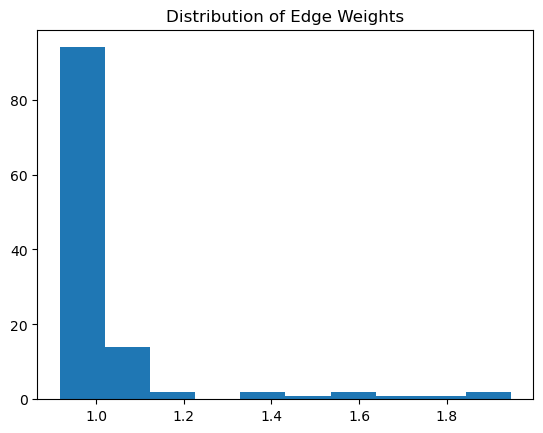

In [57]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

edge_weight_list = []
for node1, node2, data in network3.edges(data=True):
    edge_weight_list.append(float(data['weight']))

plt.hist(edge_weight_list)
plt.title("Distribution of Edge Weights")


['State', 'Government Center', 'Downtown Crossing', 'Park Street', 'Kenmore']
['Haymarket', 'North Station', 'Copley', 'JFK/UMass', 'Lechmere']


Text(0.5, 1.0, 'Katz Centrality')

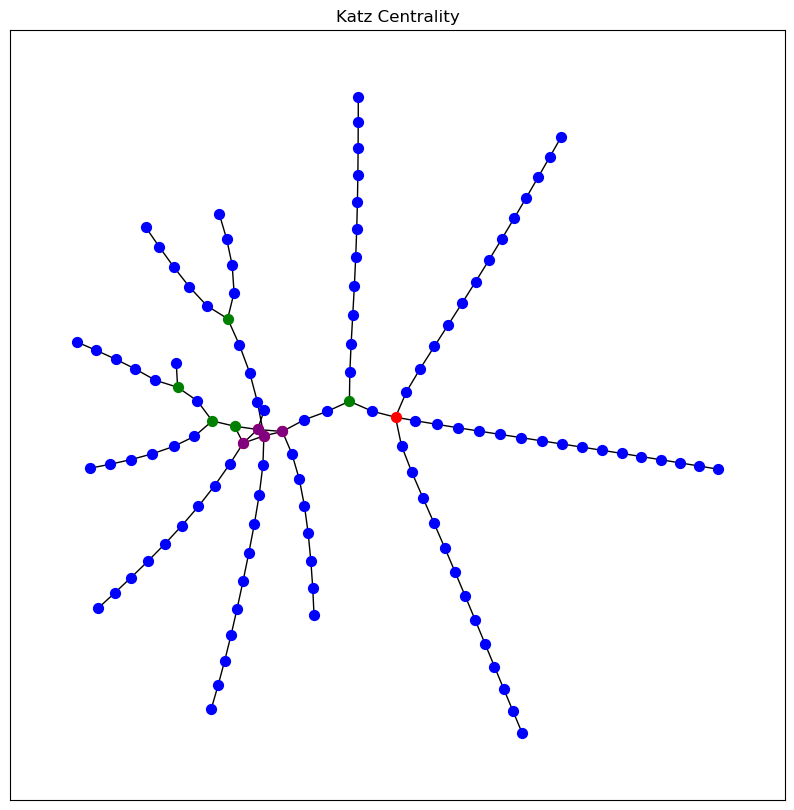

In [64]:
k_centralities = nx.katz_centrality(network3, max_iter = 1000)
sorted_k_centralities = sorted(k_centralities.items(), key=lambda x:x[1], reverse=True)

# Get the top 5 stations
high_centrality = [station for station,centrality in sorted_k_centralities][:5]

labels_high_centrality = {}    
for node in high_centrality:
    #set the node name as the key and the label as its value 
    labels_high_centrality[node] = node
# Next highest
next_high_centrality = [station for station,centrality in sorted_k_centralities][5:10]
labels_next_high_centrality = {}    
for node in next_high_centrality:
    #set the node name as the key and the label as its value 
    labels_next_high_centrality[node] = node

print(high_centrality)
print(next_high_centrality)

# remaining stations
remaining_nodes = list(set(network3.nodes()) - set(high_centrality) - set(next_high_centrality))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network3, layout, labels_high_centrality, node_color='red', node_size=50)
nx.draw_networkx_nodes(network3, layout, labels_next_high_centrality, node_color='green', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=['State', 'Government Center', 'Downtown Crossing', 'Park Street'], node_color='purple', node_size=50)
nx.draw_networkx_edges(network3, layout)
#nx.draw_networkx_labels(network3, layout, labels_high_centrality, font_size=8)
#nx.draw_networkx_labels(network3, layout, labels_next_high_centrality, font_size=8)
plt.title("Katz Centrality")

In [59]:
NL = list(network3)

def station_id_to_index(station_id_list):
    """
    Will get a list of the indices of your stations in the node list
    :param station_id_list: the stop id of your stations
    :return: the list of the indices correlated with the stop id in node list
    """
    NL_indices = []

    for id in station_id_list:
        NL_indices.append((id, NL.index(id)))

    return NL_indices


def index_to_station_id(index_list):
    """
    Will get a list of the station id of your index in the node list
    :param index_list: the list of indices
    :return: the list of station id's correlated to node list
    """
    station_list = []

    for i in index_list:
        station_list.append(NL[i])

    return station_list


def rlp(f, adjacency, epsilon, max_l=3):
    """
    Implementing the RLP algorithm into python
    :param f: 1xN vector, components corresponding to target nodes are 1 and 0 otherwise
    :param adjacency: NxN adjacecny matrix of our network
    :param epsilon: tunable parameter controlling weight of the paths with different lengths
    :param max_l: furthest nodes we consider
    :return: 1xN vector that ranks the importance of nodes on our network
    """
    s_rlp = np.zeros(len(f))

    for l in range(0, max_l):
        summation_iteration = np.power(epsilon, l) * f @ np.linalg.matrix_power(adjacency, l + 1)
        s_rlp = np.add(s_rlp, summation_iteration)

    return s_rlp


def get_ranked_stations(array):
    """
    Take the ranking and convert the numbers to stations
    :param array: the calculated stations
    :return: the station's that are important
    """

    def merge(list1, list2):
        merged_list = [(list1[i], list2[i]) for i in range(0, len(list1))]
        return merged_list

    indices = list(np.nonzero(array)[1])

    values = []
    for i in indices:
        values.append(array[0][i])

    stations = index_to_station_id(indices)

    # Create list of tuples (station, value of station)
    merged = merge(stations, values)
    # Sort on values
    merged.sort(key=lambda x: x[1], reverse = True)

    # Grab first element of each tuple
    station_sorted = (list(zip(*merged))[0])

    return station_sorted


In [60]:
# For Concert/Stadium Stations

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(Destination_station_ids)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network3)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

('Porter',
 'Central',
 "Saint Mary's Street",
 'Hynes Convention Center',
 'Blandford Street',
 'Fenway',
 'Haymarket',
 'Community College',
 'Science Park/West End',
 'Harvard',
 'Davis',
 'Kenmore',
 'Kendall/MIT',
 'North Station',
 'Hawes Street',
 'Sullivan Square',
 'Government Center',
 'State',
 'Copley',
 'Boston University East',
 'Lechmere',
 'Longwood',
 'Alewife',
 'Charles/MGH',
 'Kent Street',
 'Assembly',
 'Downtown Crossing',
 'Park Street',
 'Arlington',
 'Boston University Central',
 'Union Square',
 'Brookline Village',
 'East Somerville',
 'Prudential',
 'Aquarium',
 'Bowdoin')

Text(0.5, 1.0, "Bowen's RLP Method")

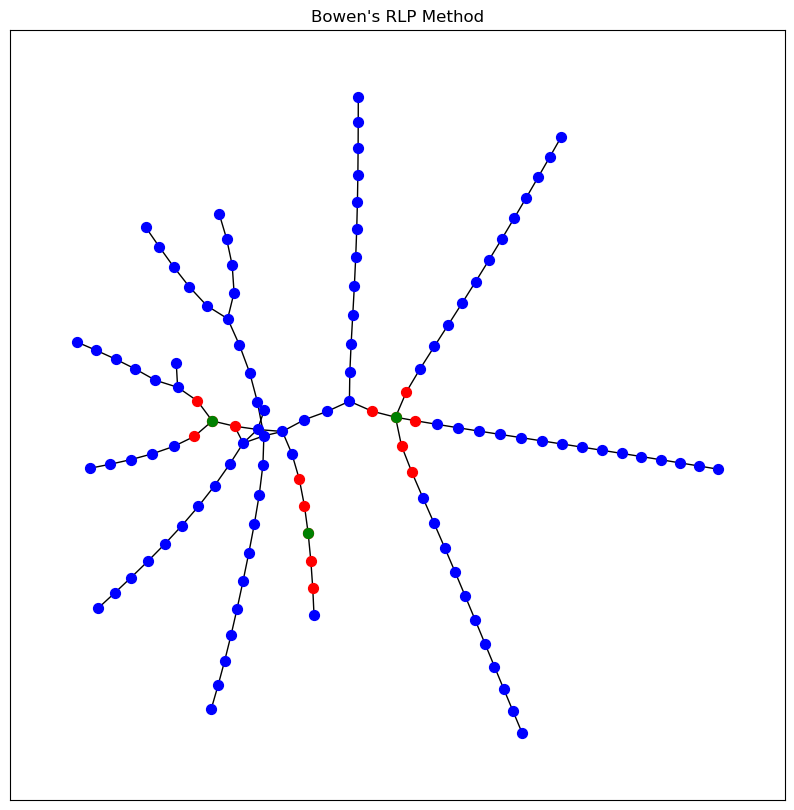

In [61]:
# proof of concept for coloring nodes
# later we can split into bins

# Get the top 6 stations
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))[:15]
# The Stations we care about
Destination_station_ids
# remaining stations
remaining_nodes = list(set(network3.nodes()) - set(important_stations) - set(Destination_station_ids))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network3, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=Destination_station_ids, node_color='green', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network3, layout)
plt.title("Bowen's RLP Method")


In [62]:
A_stadium

array([[0.        , 1.402613  , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.402613  , 0.        , 1.94642939, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.94642939, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.917589  ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.917589  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [63]:
A_stadium_og

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

Text(0.5, 1.0, 'RLP Example on High Centrality Targets')

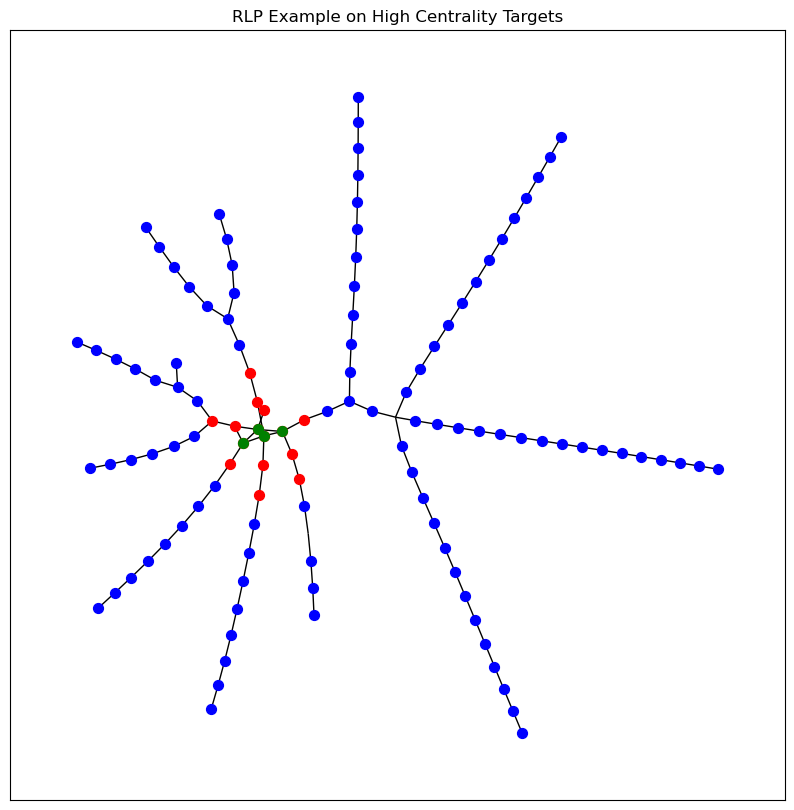

In [66]:
care_about = ['State', 'Government Center', 'Downtown Crossing', 'Park Street']

# get f
f = np.zeros((1,len(NL)))
busy_station_indices = station_id_to_index(care_about)
for i in busy_station_indices:
    f[0][i[1]] = 1
    
# Get adjacency matrix
A_stadium = nx.adjacency_matrix(network3)
A_stadium = A_stadium.toarray()

# epsilon
epsilon = 0.1


# Calculate
get_ranked_stations(rlp(f, A_stadium, epsilon, 3))

# Get the top 6 stations
important_stations = list(get_ranked_stations(rlp(f, A_stadium, epsilon, 3)))[:15]
# The Stations we care about
care_about
# remaining stations
remaining_nodes = list(set(network3.nodes()) - set(important_stations) - set(Destination_station_ids))

fig = plt.figure(figsize=(10, 10))
layout = nx.kamada_kawai_layout(network)
nx.draw_networkx_nodes(network3, layout, nodelist=important_stations, node_color='red', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=care_about, node_color='green', node_size=50)
nx.draw_networkx_nodes(network3, layout, nodelist=remaining_nodes, node_color='blue', node_size=50)
nx.draw_networkx_edges(network3, layout)
plt.title("RLP Example on High Centrality Targets")
